<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el  tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [4]:
# Utilice este espacio para escribir el código.
import pandas as pd

# 1. Cargar artistas
artists = pd.read_csv("artists.dat", sep="\t")
artists = artists[["id", "name"]]
# Se Renombran columnas
artists = artists.rename(columns={"id": "artistID", "name": "artist_name"})

# 2. Cargar usuarios–artistas
user_artists = pd.read_csv("user_artists.dat", sep="\t")
# Se Renombran columnas
user_artists = user_artists.rename(columns={
    "userID": "userID",
    "artistID": "artistID",
    "weight": "nro_reproducciones"})

# 3. Uniendo bases
df = user_artists.merge(artists, on="artistID", how="left")

df.head()


,userID,artistID,nro_reproducciones,artist_name
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba
2,2,53,11351,Air
3,2,54,10300,Hooverphonic
4,2,55,8983,Kylie Minogue


Se cargan las dos bases de datos, se seleccionaron y renombraron las columnas según lo indicado y luego se unieron a través de la clave artistID.
El resultado es un DataFrame que contiene el identificador de usuario (userID), el identificador del artista (artistID), el número de reproducciones (nro_reproducciones) y el nombre del artista (artist_name)

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

Número de usuarios únicos: 1892
Número de artistas únicos: 17632

Top 10 artistas por probabilidad no ponderada:
artistID
89     0.006582
289    0.005623
288    0.005214
227    0.005171
300    0.005095
67     0.004621
333    0.004492
292    0.004384
190    0.004309
498    0.004298
Name: userID, dtype: float64

Top 10 artistas por probabilidad ponderada:
artistID
289    0.034591
72     0.018809
89     0.018666
292    0.015298
498    0.013926
67     0.013315
288    0.013087
701    0.009952
227    0.009570
300    0.007698
Name: nro_reproducciones, dtype: float64


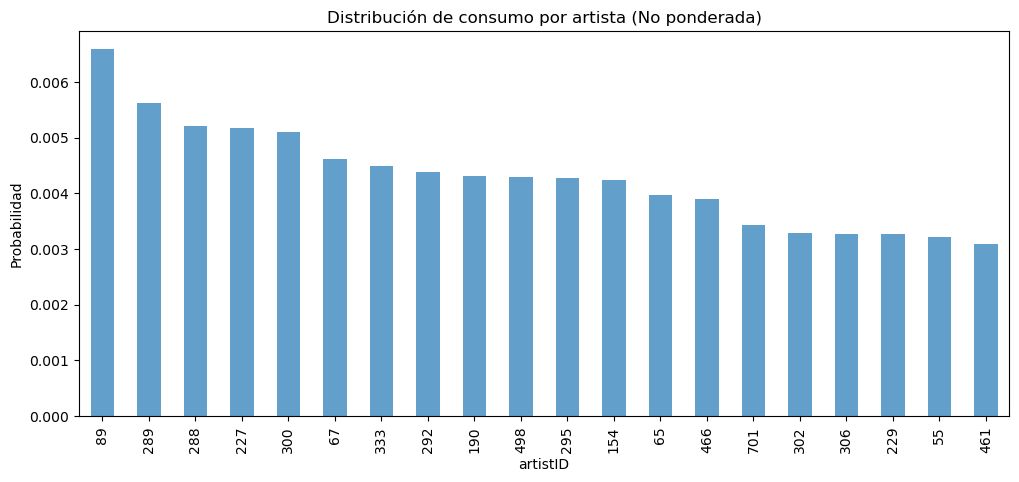

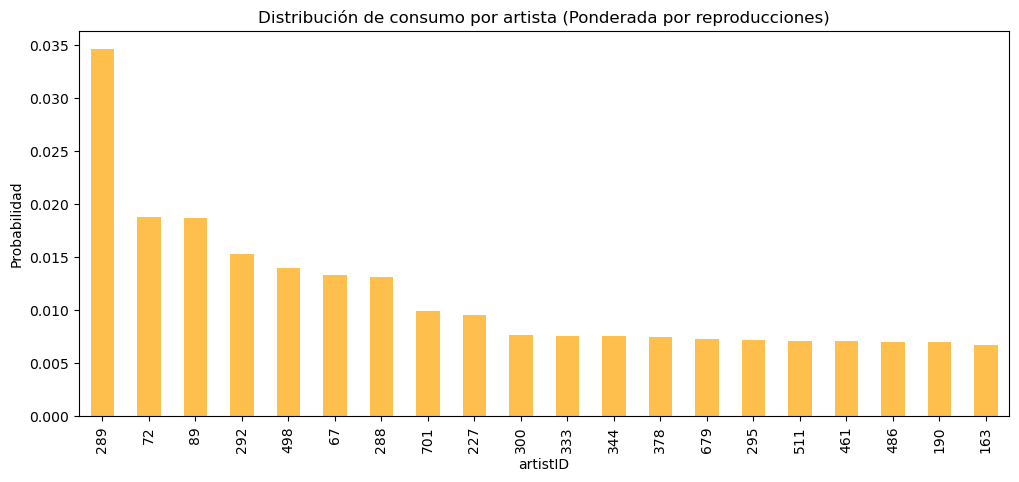

In [6]:
# Utilice este espacio para escribir el código.
# Usuarios y artistas en la base
n_usuarios = df["userID"].nunique()
n_artistas = df["artistID"].nunique()

print("Número de usuarios únicos:", n_usuarios)
print("Número de artistas únicos:", n_artistas)

# Distribución de probabilidad del consumo por artista sin ponderar
usuarios_por_artista = df.groupby("artistID")["userID"].nunique()
prob_no_ponderada = usuarios_por_artista / usuarios_por_artista.sum()

# Distribución de probabilidad del consumo por artista ponderado
reproducciones_por_artista = df.groupby("artistID")["nro_reproducciones"].sum()
prob_ponderada = reproducciones_por_artista / reproducciones_por_artista.sum()

# Mostrar top 10 artistas en ambas distribuciones
print("\nTop 10 artistas por probabilidad no ponderada:")
print(prob_no_ponderada.sort_values(ascending=False).head(10))

print("\nTop 10 artistas por probabilidad ponderada:")
print(prob_ponderada.sort_values(ascending=False).head(10))

# Gráficas comparativas
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
prob_no_ponderada.sort_values(ascending=False).head(20).plot(kind="bar", alpha=0.7, label="No ponderada")
plt.title("Distribución de consumo por artista (No ponderada)")
plt.ylabel("Probabilidad")
plt.show()

plt.figure(figsize=(12,5))
prob_ponderada.sort_values(ascending=False).head(20).plot(kind="bar", alpha=0.7, color="orange", label="Ponderada")
plt.title("Distribución de consumo por artista (Ponderada por reproducciones)")
plt.ylabel("Probabilidad")
plt.show()


Primero se contó el número de usuarios únicos (1.892) y artistas únicos (17.632) en la base.
Posteriormente se calcularon dos distribuciones de probabilidad del consumo por artista:

Distribución no ponderada: se midió la proporción de usuarios que escucharon a cada artista.
Aquí aparecen como relevantes los artistas que han sido escuchados por más personas, aunque no necesariamente con muchas reproducciones.

Distribución ponderada: se midió la proporción del total de reproducciones acumuladas por cada artista.
En este caso destacan artistas que concentran un alto volumen de escuchas, incluso si no son tan diversos en cantidad de usuarios.

Comparación:

La distribución no ponderada refleja popularidad en alcance (qué tan difundido está un artista entre los usuarios).

La distribución ponderada refleja popularidad en intensidad (qué tanto se reproduce un artista en total).

Por ejemplo, el artista con ID 289 aparece en ambas distribuciones, pero con un peso mucho mayor en la ponderada, lo que indica que además de tener muchos oyentes, concentra una gran cantidad de reproducciones.

En contraste, otros artistas pueden ser escuchados por varios usuarios sin que eso implique un volumen alto de reproducciones.

Conclusión:

La diferencia entre ambas métricas muestra que alcance en diferente a intensidad. Algunos artistas tienen presencia masiva pero consumo superficial, mientras que otros, aunque tengan menos oyentes, logran un consumo intensivo. Esto es clave para sistemas de recomendación, ya que se puede elegir recomendar artistas “populares” en general o aquellos más reproducidos dentro de ciertos nichos.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


        artist_name  nro_reproducciones  reproduccion_relativa
317       No Angels                6291               0.173406
318           Sandy                2396               0.066044
307  Britney Spears                2258               0.062240
319  Vanessa Petruo                1735               0.047824
310         Beyoncé                1425               0.039279
320       Alexander                1407               0.038783
311       Sugababes                1039               0.028639
321     Queensberry                 963               0.026544
301       Lady Gaga                 921               0.025387
322    Fady Maalouf                 819               0.022575


/var/folders/j8/glyphq3x2j12b0l0jp9zch3m0000gn/T/ipykernel_8955/2140404096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario8["reproduccion_relativa"] = usuario8["nro_reproducciones"] / usuario8["nro_reproducciones"].sum()


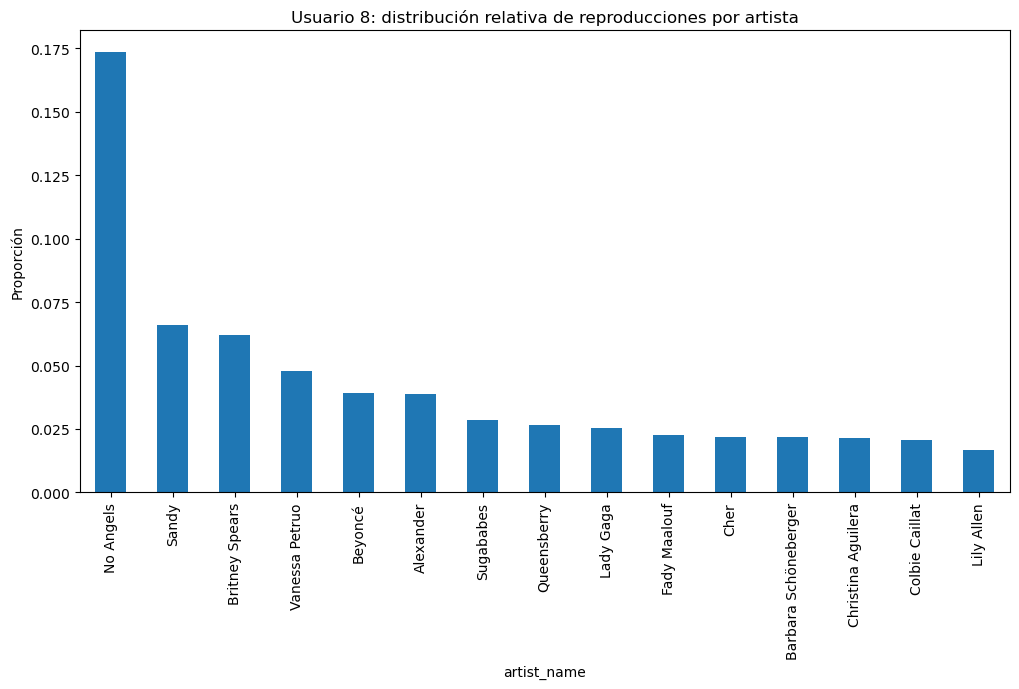

In [8]:
# Utilice este espacio para escribir el código.
# Usuario 8
usuario8 = df[df["userID"] == 8]

# Calcular proporción relativa de cada artista
usuario8["reproduccion_relativa"] = usuario8["nro_reproducciones"] / usuario8["nro_reproducciones"].sum()

# Ordenar de mayor a menor
usuario8 = usuario8.sort_values("reproduccion_relativa", ascending=False)

# Mostrar top 10
print(usuario8[["artist_name", "nro_reproducciones", "reproduccion_relativa"]].head(10))

# Gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
usuario8.set_index("artist_name")["reproduccion_relativa"].head(15).plot(kind="bar")
plt.title("Usuario 8: distribución relativa de reproducciones por artista")
plt.ylabel("Proporción")
plt.show()


Se filtraron los registros correspondientes al usuario 8 y se calcularon las reproducciones relativas, dividiendo las reproducciones de cada artista por el total de reproducciones de este usuario.
Posteriormente se organizaron los artistas de mayor a menor y se graficó la distribución.

Análisis:

El usuario 8 concentra una parte importante de su consumo en el grupo No Angels, que representa aproximadamente el 17% de todas sus reproducciones.
En segundo lugar aparecen Sandy (6,6%) y Britney Spears (6,2%), seguidos de otros artistas como Vanessa Petruo, Beyoncé, Alexander y Sugababes, todos con proporciones menores al 5%.
El gráfico evidencia que, aunque escucha varios artistas, existe una alta concentración en unos pocos, con una caída pronunciada después del primero.

Conclusiones:

El usuario 8 muestra un comportamiento de fidelidad a ciertos artistas, en particular No Angels, seguido de algunos artistas de pop internacional.
Podemos inferir que sus preferencias están muy orientadas hacia el pop femenino y agrupaciones juveniles, lo que indica un perfil de oyente bastante definido.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

   artistID  userID      artist_name
0       227     480      The Beatles
1        67     429          Madonna
2       333     417    Avril Lavigne
3       190     400             Muse
4       498     399         Paramore
5       154     393        Radiohead
6        65     369         Coldplay
7       466     362            Ke$ha
8       701     319          Shakira
9       306     304  Black Eyed Peas


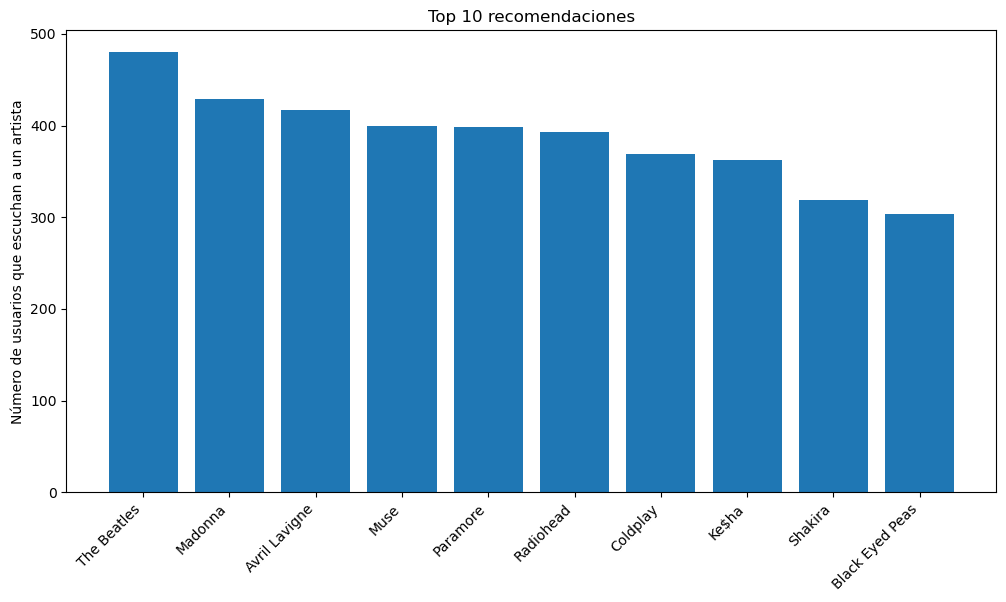

In [10]:
# Utilice este espacio para escribir el código.

# Calculamos popularidad de cada artista / cuántos usuarios únicos lo escuchan
popularidad = df.groupby("artistID")["userID"].nunique()

# Excluimos los artistas que ya escuchó el usuario 8
artistas_usuario8 = df[df["userID"] == 8]["artistID"].unique()
popularidad_sin_usuario8 = popularidad.drop(artistas_usuario8, errors="ignore")

# Ordenamos y tomamos el top 10
top10_promedio_simple = popularidad_sin_usuario8.sort_values(ascending=False).head(10)

# Agregamos nombres de artistas
top10_promedio_simple = top10_promedio_simple.reset_index().merge(
    artists[["artistID", "artist_name"]], on="artistID", how="left")

# Resultados
print(top10_promedio_simple)

# Gráficas
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10_promedio_simple["artist_name"], top10_promedio_simple["userID"])
plt.title("Top 10 recomendaciones")
plt.ylabel("Número de usuarios que escuchan a un artista")
plt.xticks(rotation=45, ha="right")
plt.show()


Se construyo una métrica de popularidad por artista como el número de usuarios distintos que lo han escuchado (n_users_por_artista = nunique(userID)), sin considerar el número de veces que lo reproducen.

Se exluyo del ranking a los artistas ya escuchados por el usuario 8, para que las recomendaciones sean nuevas como se indica luego se organiza de mayor a menor y se organiza el Top-10. Finalmente se unieron los nombres (artist_name) para reportar una tabla y una gráfica.

Análisis de resultados

Este método recomienda los artistas con mayor número de oyentes en general, sin tener en cuenta la intensidad de reproducciones ni las preferencias específicas del usuario, por lo tanto, los artistas recomendados tienden a ser los más mainstream o populares en toda la base de datos.

Conclusión

Este método de promedio simple entrega un Top-10 de alta difusión general y sirve como punto de partida, este genera recomendaciones muy generales, adecuadas si el objetivo es dar a conocer artistas populares.
Sin embargo, puede carecer de personalización, el usuario 8 recibirá los mismos artistas recomendados que cualquier otro usuario que aún no los haya escuchado.

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Utilice un promedio ponderado para generar las recomendaciones. Considere el número de veces que los usuarios reproducen al artista. En otras palabras, genere un ponderador que use el número de veces que el artista fue reproducido (`nro_reproducciones`). Este método pondera la popularidad de un artista, combinando el número de usuarios que lo escuchan con la frecuencia de reproducción, de manera que los artistas con más reproducciones reciban una mayor ponderación.

Genere una tabla y/o gráfica con las 10 principales recomendaciones de artistas para este usuario. Explique detalladamente su procedimiento y justifique sus elecciones. Compare estas recomendaciones con las del sistema implementado en el paso anterior.

   artistID          0    artist_name
0        67  395193942        Madonna
1       498  384416151       Paramore
2        72  366968856   Depeche Mode
3       227  317815680    The Beatles
4       701  219640751        Shakira
5       333  219276948  Avril Lavigne
6       190  194030400           Muse
7       154  151425258      Radiohead
8       461  139872590    Miley Cyrus
9       466  139154610          Ke$ha


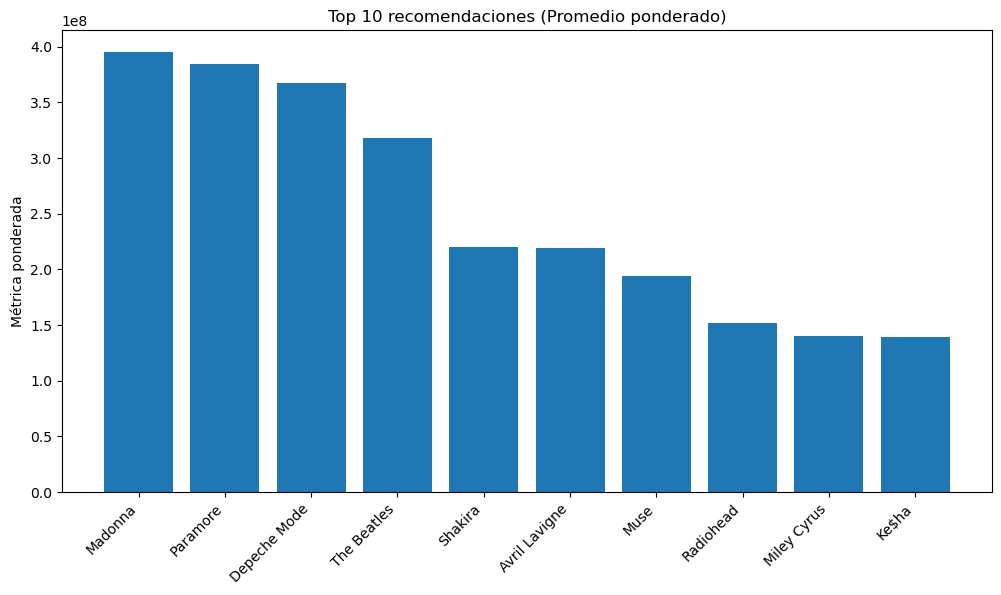

In [12]:
# Utilice este espacio para escribir el código.

# calculamos una métrica que combine usuarios y reproducciones
usuarios_por_artista = df.groupby("artistID")["userID"].nunique()
reproducciones_por_artista = df.groupby("artistID")["nro_reproducciones"].sum()

# Promedio ponderado / usuarios * total_reproducciones
ponderado = usuarios_por_artista * reproducciones_por_artista

# Excluimos artistas ya escuchados por el usuario 8
artistas_usuario8 = df[df["userID"] == 8]["artistID"].unique()
ponderado_sin_usuario8 = ponderado.drop(artistas_usuario8, errors="ignore")

# Ordenamos y tomamos el top 10
top10_ponderado = ponderado_sin_usuario8.sort_values(ascending=False).head(10).reset_index()

# Agregamos nombres de artistas
top10_ponderado = top10_ponderado.merge(
    artists[["artistID", "artist_name"]], on="artistID", how="left")

# Resultados
print(top10_ponderado)

# Gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10_ponderado["artist_name"], top10_ponderado[0])
plt.title("Top 10 recomendaciones (Promedio ponderado)")
plt.ylabel("Métrica ponderada")
plt.xticks(rotation=45, ha="right")
plt.show()


Se calcularon dos métricas por artista:
1. Número de usuarios distintos que lo escuchan.
2. Total de reproducciones acumuladas.

Se construyó un ponderador multiplicando ambas métricas, de manera que los artistas con muchos oyentes y además con alto número de reproducciones obtienen mayor puntuación, ademas, se eliminaron del ranking los artistas ya escuchados por el usuario 8 para asegurar recomendaciones nuevas y se ordenaron los artistas por esta métrica y se seleccionaron los 10 principales.

Análisis

El ranking obtenido incluye artistas como Madonna, Paramore, Depeche Mode, The Beatles, Shakira, Avril Lavigne, Muse, Radiohead, Miley Cyrus y Ke$ha.

Comparado con el promedio simple, se observan algunas coincidencias (Madonna, The Beatles, Avril Lavigne, Muse, Radiohead), pero aparecen artistas nuevos que destacan no solo por ser escuchados por muchos, sino también por el volumen de reproducciones (Depeche Mode, Miley Cyrus), Esta gráfica muestra cómo Madonna y Paramore sobresalen con los valores ponderados más altos, lo que indica que no solo son escuchados ampliamente, sino también intensivamente.

Conclusiones

Este método entrega recomendaciones más equilibradas, al tener en cuenta tanto el alcance y las reproducciones totales.

Genera una lista de artistas que combinan popularidad masiva e intensidad de reproducción, lo que lo hace más robusto que el promedio simple, sin embargo, sigue siendo un enfoque global: tiende a recomendar lo que es popular en toda la comunidad, sin personalización profunda al usuario 8.

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

   artistID        score     artist_name
0       466  3758.922518           Ke$ha
1       523  3206.966055   Lindsay Lohan
2        55  3092.208337   Kylie Minogue
3       318  2839.219603     Hilary Duff
4        67  2785.194089         Madonna
5      4350  2667.223971           Rouge
6       332  2651.243711   Kelly Rowland
7       293  2613.696671  Ashlee Simpson
8       525  2457.115509    Gwen Stefani
9       972  2431.339088        t.A.T.u.


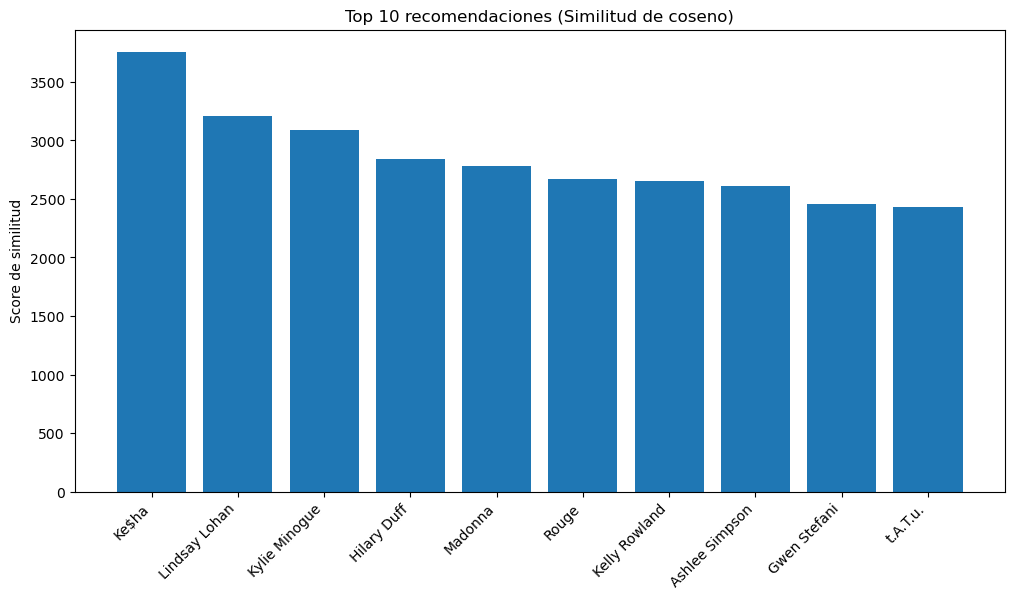

In [14]:
# Utilice este espacio para escribir el código.
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Filtrado colaborativo: similitud de coseno (item-based)

# Construimos la matriz usuario–artista
user_artist_matrix = df.pivot_table(
    index="userID", columns="artistID", values="nro_reproducciones", fill_value=0)

# Calculamos la matriz de similitud de coseno entre artistas (Apartado tomado de la IA)
sim_matrix = cosine_similarity(user_artist_matrix.T)  
# (similaridad entre columnas - artistas)
sim_df = pd.DataFrame(sim_matrix, index=user_artist_matrix.columns, columns=user_artist_matrix.columns)

# Obtenemos artistas que ya escuchó el usuario 8
artistas_usuario8 = user_artist_matrix.loc[8]
artistas_consumidos = artistas_usuario8[artistas_usuario8 > 0].index

# Calculamos score de recomendación
scores = pd.Series(0, index=user_artist_matrix.columns, dtype=float)

for artist in artistas_consumidos:
    scores += sim_df[artist] * artistas_usuario8[artist]

# Eliminamos artistas ya consumidos
scores = scores.drop(artistas_consumidos, errors="ignore")

# Ordenamos y tomamos el top 10
top10_coseno = scores.sort_values(ascending=False).head(10).reset_index()
top10_coseno.columns = ["artistID", "score"]

# Agregamos nombres de artistas
top10_coseno = top10_coseno.merge(
    artists[["artistID", "artist_name"]], on="artistID", how="left")

# Resultados
print(top10_coseno)

# Gráfica
plt.figure(figsize=(12,6))
plt.bar(top10_coseno["artist_name"], top10_coseno["score"])
plt.title("Top 10 recomendaciones (Similitud de coseno)")
plt.ylabel("Score de similitud")
plt.xticks(rotation=45, ha="right")
plt.show()


Se construyó la matriz usuario–artista con el número de reproducciones y se calculó la similitud de coseno entre todos los artistas, midiendo qué tan parecidos son sus patrones de consumo entre los usuarios.

Para el usuario 8 se identificaron los artistas ya escuchados y se calculó un score de recomendación para cada candidato como la suma de las similitudes con los artistas consumidos, ponderada por el número de reproducciones del usuario, se excluyeron los artistas ya presentes en su historial y se seleccionaron los 10 principales.

Análisis

El top 10 incluye artistas como Ke$ha, Lindsay Lohan, Kylie Minogue, Hilary Duff, Madonna, Rouge, Kelly Rowland, Ashlee Simpson, Gwen Stefani y t.A.T.u, se observa, que la mayoría pertenecen al pop femenino o pop adolescente, un patrón coherente con los gustos previamente identificados en el usuario 8.

A diferencia del metodo anterior, aquí no destacan artistas de rock clásico o alternativo como The Beatles o Radiohead, lo que evidencia que la similitud de coseno está capturando mejor el perfil particular del usuario.

Conclusiones

El método de similitud de coseno genera recomendaciones mucho más personalizadas y relevantes, alineadas con el estilo de música que consume el usuario 8, se reduce el sesgo hacia la popularidad global y se priorizan artistas similares en patrones de escucha.
Comparado con el promedio simple y ponderado, este sistema produce sugerencias que reflejan de manera más clara las preferencias reales del usuario.

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


   artistID       score       artist_name
0       466  292.566180             Ke$ha
1        55  266.615459     Kylie Minogue
2       161  199.147974  Enrique Iglesias
3       294  183.756069       Leona Lewis
4       306  118.983709   Black Eyed Peas
5       157  116.061359   Michael Jackson
6      1459  115.245686  Carrie Underwood
7       913   97.516860   Destiny's Child
8       314   96.104523             Ciara
9       299   95.300514    Jennifer Lopez


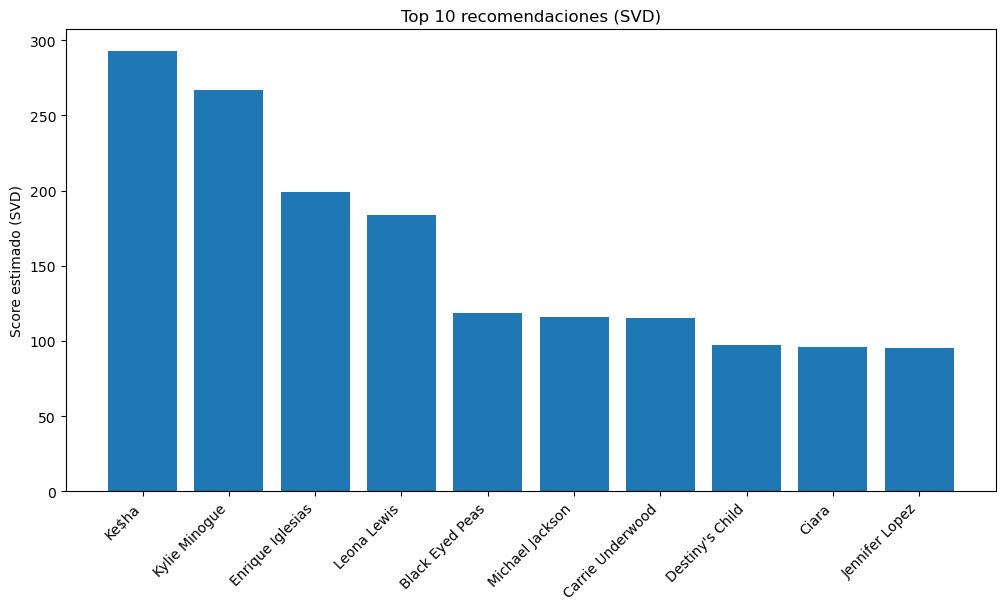

In [15]:
# Utilice este espacio para escribir el código.
from sklearn.decomposition import TruncatedSVD

# Filtrado colaborativo usando SVD

# Matriz usuario–artista
user_artist_matrix = df.pivot_table(index="userID", columns="artistID", values="nro_reproducciones", fill_value=0)

# Aplicar SVD truncado
svd = TruncatedSVD(n_components=50, random_state=42)  # 50 dimensiones latentes
U = svd.fit_transform(user_artist_matrix)   # usuarios en espacio latente
VT = svd.components_                        # artistas en espacio latente
approx = np.dot(U, VT)                      # reconstrucción aproximada

# Obtener predicciones para el usuario 8
u_idx = user_artist_matrix.index.get_loc(8)
scores = approx[u_idx]

# Eliminar artistas ya escuchados
artistas_consumidos = user_artist_matrix.loc[8]
mask_consumidos = artistas_consumidos > 0
scores[mask_consumidos.values] = -np.inf

# Ordenamos y tomamos el top 10
top10_svd_idx = np.argsort(scores)[-10:][::-1]
top10_svd = pd.DataFrame({
    "artistID": user_artist_matrix.columns[top10_svd_idx],
    "score": scores[top10_svd_idx]})

# Agregamos nombres de artistas
top10_svd = top10_svd.merge(
    artists[["artistID", "artist_name"]], on="artistID", how="left")

# Resultados
print(top10_svd)

# Gráfica
plt.figure(figsize=(12,6))
plt.bar(top10_svd["artist_name"], top10_svd["score"])
plt.title("Top 10 recomendaciones (SVD)")
plt.ylabel("Score estimado (SVD)")
plt.xticks(rotation=45, ha="right")
plt.show()


Se construyó la matriz usuario–artista con el número de reproducciones y se aplicó la descomposición en valores singulares (SVD truncado) con 50 componentes latentes para obtener representaciones comprimidas de usuarios y artistas, se tomaron 50 componentes, en este caso, con 1.800 usuarios y 17.000 artistas, 50 es un buen punto de partida lo suficientemente pequeño para comprimir, pero lo bastante grande para capturar diversidad; tomar menos de 50 hace que se pierda informacion y tomar mas deja de capturar patrones latentes y aumenta el costo comptacional.

Se reconstruyó la matriz aproximada de preferencias, que asigna un score estimado a cada usuario–artista.

Para el usuario 8 se tomaron los scores, se eliminaron los artistas ya escuchados y se seleccionaron los 10 con mayor puntuación.

Análisis

El top 10 incluye artistas como Ke$ha, Kylie Minogue, Enrique Iglesias, Leona Lewis, Black Eyed Peas, Michael Jackson, Carrie Underwood, Destiny’s Child, Ciara y Jennifer Lopez, se observa una mezcla entre artistas de pop femenino (alineados con el perfil del usuario) y otros más variados como Enrique Iglesias o Michael Jackson, lo que muestra la capacidad del modelo de descubrir conexiones latentes no tan evidentes en métodos previos, comparado con el coseno, el SVD tiende a ser más diverso y a incluir artistas que no necesariamente aparecían como similares directos, pero que encajan en el mismo espacio de factores.

Conclusiones

El SVD ofrece un enfoque más sofisticado, ya que no depende solo de popularidad ni similitud directa, sino de factores latentes que capturan patrones de consumo ocultos, este método permite mayor capacidad de descubrimiento de artistas que el usuario podría disfrutar, incluso si no son obvios en sus preferencias inmediatas.

En comparación con los promedios simples y ponderados, y con el coseno, el SVD logra un balance entre personalización y variedad, ampliando las opciones para el usuario 8.

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


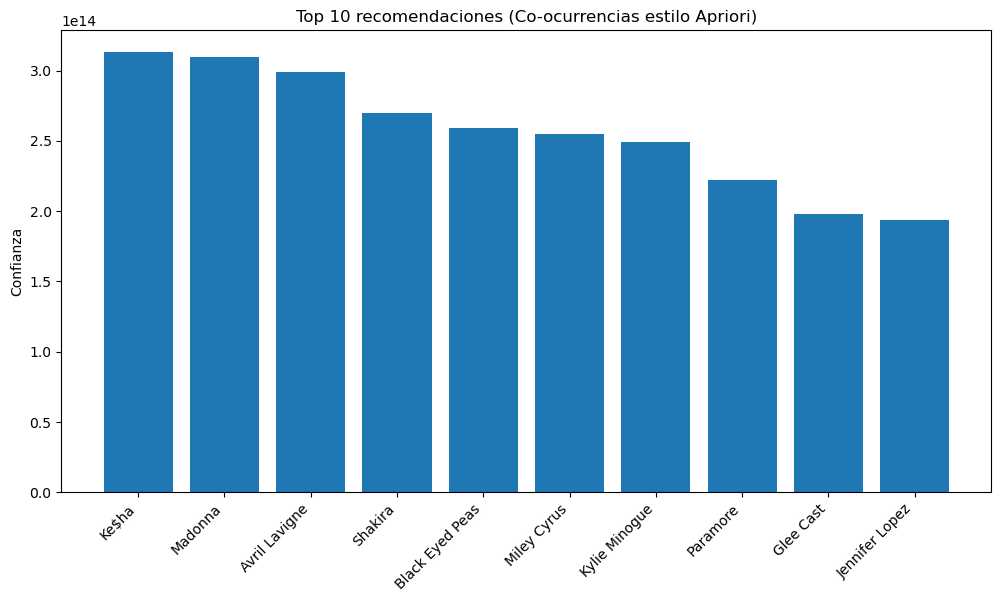

In [18]:
# Utilice este espacio para escribir el código.
import numpy as np, pandas as pd
from scipy.sparse import csr_matrix

# === 1) Matriz dispersa usuario–artista booleana ===
tmp = df[["userID","artistID"]].copy()
tmp["val"] = 1
# Mapear a índices categóricos (compactos)
u_cats = tmp["userID"].astype("category")
i_cats = tmp["artistID"].astype("category")
rows = u_cats.cat.codes.values
cols = i_cats.cat.codes.values
UR_bool = csr_matrix((tmp["val"].values, (rows, cols)),
                     shape=(u_cats.cat.categories.size, i_cats.cat.categories.size))

user_index_to_id = dict(enumerate(u_cats.cat.categories))
artist_index_to_id = dict(enumerate(i_cats.cat.categories))
artist_id_to_index = {v:k for k,v in artist_index_to_id.items()}

n_users = UR_bool.shape[0]

# === 2) Reducir al top-N de artistas populares para no explotar memoria ===
N = 300  # puedes subir/bajar si el equipo lo soporta
oyentes_por_artista = np.asarray(UR_bool.sum(axis=0)).ravel()
top_idx = np.argsort(-oyentes_por_artista)[:N]

UR_top = UR_bool[:, top_idx]                 # (usuarios x topN)
# Co-ocurrencias entre artistas topN (matriz NxN)
cooc = (UR_top.T @ UR_top).astype(np.int32)  # sigue siendo dispersa si hay pocos cruces
cooc = cooc.toarray()                        # N es pequeño: conviértela a denso para operar fácil

# Soporte de cada artista y de cada par
supp_item = cooc.diagonal() / n_users
np.fill_diagonal(cooc, 0)  # evitar dividir por cero en la misma diagonal

# === 3) Reglas relevantes para el usuario 8 (antecedente ∈ historial del u8) ===
id_u = 8
if id_u not in user_index_to_id.values():
    raise ValueError("El usuario 8 no existe en la base.")

# Índices internos de los artistas que escuchó el u8 (restringidos al topN)
u8_row = list(user_index_to_id.keys())[list(user_index_to_id.values()).index(id_u)]
u8_vec = UR_bool[u8_row, :].toarray().ravel()   # sobre todos
consumidos_idx_all = np.where(u8_vec > 0)[0]
consumidos_idx_top = [artist_id_to_index[artist_index_to_id[i]]
                      for i in consumidos_idx_all
                      if artist_index_to_id[i] in artist_id_to_index and artist_id_to_index[artist_index_to_id[i]] in top_idx]

# Pasar índices globales -> índices relativos dentro de top_idx
pos_en_top = {idx:i for i, idx in enumerate(top_idx)}
consumidos_rel = [pos_en_top[idx] for idx in consumidos_idx_top if idx in pos_en_top]

recs = []
for a in consumidos_rel:
    oyentes_a = cooc[a,a] + 1e-12  # por si acaso
    # confianza(a->b) = cooc(a,b) / oyentes(a)
    conf = cooc[a, :] / oyentes_a
    # support(b) para lift = conf / supp(b)
    lift = conf / (supp_item + 1e-12)
    # armar tabla candidata
    for b in np.argsort(-conf)[:50]:  # toma top 50 por antecedente para no explotar
        if b == a: 
            continue
        recs.append((a, b, cooc[a,b]/n_users, conf[b], lift[b]))

rec_df = pd.DataFrame(recs, columns=["a_idx","b_idx","support","confidence","lift"])
# Quitar artistas ya escuchados
rec_df = rec_df[~rec_df["b_idx"].isin(consumidos_rel)]

# Deduplicar por recomendado b quedándome con la mejor regla (mayor confidence, luego lift)
rec_df = rec_df.sort_values(["confidence","lift"], ascending=False)\
               .drop_duplicates(subset=["b_idx"], keep="first")\
               .head(10)

# Agregar IDs y nombres
rec_df["antecedente_id"] = rec_df["a_idx"].map(lambda x: artist_index_to_id[top_idx[x]])
rec_df["recomendado_id"] = rec_df["b_idx"].map(lambda x: artist_index_to_id[top_idx[x]])
rec_df = rec_df.merge(artists[["artistID","artist_name"]], left_on="recomendado_id", right_on="artistID", how="left")

rec_df[["antecedente_id","artist_name","support","confidence","lift"]]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(rec_df["artist_name"], rec_df["confidence"])
plt.title("Top 10 recomendaciones (Co-ocurrencias estilo Apriori)")
plt.ylabel("Confianza")
plt.xticks(rotation=45, ha="right")
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).